In [ ]:
# Data manipulation
library(tidyverse)

# Train-test split & evaluation
library(caret)

# Logistic Regression
library(stats)

# Random Forest
library(randomForest)

# Performance metrics
library(pROC)

# SMOTE implementation
library(themis)





Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Loading required package: recipes


Attaching package: ‘recipes’


The following object is masked from ‘package:stringr’:

    fixed


The following object is masked from ‘package:stats’:

    step




In [ ]:
install.packages(c(
  "tidyverse",
  "caret",
  "randomForest",
  "pROC",
  "themis"
))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘recipes’, ‘reshape2’, ‘gower’, ‘RANN’, ‘ROSE’, ‘hardhat’




In [ ]:
# Load dataset
stroke_data <- read.csv("stroke_cleaned.csv")

# View structure of data
str(stroke_data)

# View first few rows
head(stroke_data)


'data.frame':	4896 obs. of  14 variables:
 $ id               : int  9046 31112 60182 1665 56669 53882 10434 60491 12109 12095 ...
 $ gender           : chr  "Male" "Male" "Female" "Female" ...
 $ age              : num  67 80 49 79 81 74 69 78 81 61 ...
 $ hypertension     : int  0 0 0 1 0 1 0 0 1 0 ...
 $ heart_disease    : int  1 1 0 0 0 1 0 0 0 1 ...
 $ ever_married     : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ work_type        : chr  "Private" "Private" "Private" "Self-employed" ...
 $ residence_type   : chr  "Urban" "Rural" "Urban" "Rural" ...
 $ avg_glucose_level: num  229 106 171 174 186 ...
 $ bmi              : num  36.6 32.5 34.4 24 29 27.4 22.8 24.2 29.7 36.8 ...
 $ smoking_status   : chr  "formerly smoked" "never smoked" "smokes" "never smoked" ...
 $ stroke           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ age_group        : chr  "Senior" "Senior" "Middle Age" "Senior" ...
 $ bmi_category     : chr  "Obese" "Obese" "Obese" "Normal" ...


,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_category
,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>
1,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior,Obese
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior,Obese
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Middle Age,Obese
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior,Normal
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Senior,Overweight
6,53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,Senior,Overweight


In [ ]:
# Convert target variable to factor (VERY IMPORTANT in R)
stroke_data$stroke <- factor(stroke_data$stroke, levels = c(0, 1))

# Check missing values
colSums(is.na(stroke_data))

# Remove rows with missing values (simple approach for learning)
stroke_data <- na.omit(stroke_data)


id            gender               age      hypertension 
                0                 0                 0                 0 
    heart_disease      ever_married         work_type    residence_type 
                0                 0                 0                 0 
avg_glucose_level               bmi    smoking_status            stroke 
                0                 0                 0                 0 
        age_group      bmi_category 
                0                 0

In [ ]:
set.seed(123)  # for reproducibility

# 70% training, 30% testing
train_index <- createDataPartition(stroke_data$stroke, p = 0.7, list = FALSE)

train_data <- stroke_data[train_index, ]
test_data  <- stroke_data[-train_index, ]


In [ ]:
# Identify numeric columns
numeric_cols <- sapply(train_data, is.numeric)

# Scale numeric features
train_data[, numeric_cols] <- scale(train_data[, numeric_cols])
test_data[, numeric_cols]  <- scale(test_data[, numeric_cols])


In [ ]:
# Train logistic regression
log_model <- glm(
  stroke ~ .,
  data = train_data,
  family = binomial
)

# View model summary
summary(log_model)



Call:
glm(formula = stroke ~ ., family = binomial, data = train_data)

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -1.93184    1.21221  -1.594   0.1110    
id                            0.04566    0.08879   0.514   0.6070    
genderMale                   -0.04191    0.18690  -0.224   0.8226    
genderOther                 -13.42428 6522.63863  -0.002   0.9984    
age                           2.12948    0.34321   6.205 5.48e-10 ***
hypertension                  0.13396    0.06061   2.210   0.0271 *  
heart_disease                 0.10707    0.05286   2.026   0.0428 *  
ever_marriedYes              -0.30223    0.28727  -1.052   0.2928    
work_typeGovt_job           -13.49269  604.73608  -0.022   0.9822    
work_typeNever_worked       -23.43185 1632.49386  -0.014   0.9885    
work_typePrivate            -13.37690  604.73603  -0.022   0.9824    
work_typeSelf-employed      -13.88153  604.73607  -0.023   0.9817    
resi

In [ ]:
# Predict probabilities
log_probs <- predict(log_model, test_data, type = "response")

# Convert probabilities to class labels (0/1)
log_pred <- ifelse(log_probs > 0.5, 1, 0)
log_pred <- factor(log_pred, levels = c(0, 1))

# Confusion matrix
confusionMatrix(log_pred, test_data$stroke)

# ROC & AUC
log_roc <- roc(test_data$stroke, log_probs)
auc(log_roc)


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1404   61
         1    2    1
                                          
               Accuracy : 0.9571          
                 95% CI : (0.9454, 0.9669)
    No Information Rate : 0.9578          
    P-Value [Acc > NIR] : 0.5846          
                                          
                  Kappa : 0.027           
                                          
 Mcnemar's Test P-Value : 2.725e-13       
                                          
            Sensitivity : 0.99858         
            Specificity : 0.01613         
         Pos Pred Value : 0.95836         
         Neg Pred Value : 0.33333         
             Prevalence : 0.95777         
         Detection Rate : 0.95640         
   Detection Prevalence : 0.99796         
      Balanced Accuracy : 0.50735         
                                          
       'Positive' Class : 0               
                        

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.8619

In [ ]:
set.seed(123)

rf_model <- randomForest(
  stroke ~ .,
  data = train_data,
  ntree = 300,
  importance = TRUE
)

# View model summary
print(rf_model)



Call:
 randomForest(formula = stroke ~ ., data = train_data, ntree = 300,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 3

        OOB estimate of  error rate: 4.38%
Confusion matrix:
     0 1  class.error
0 3278 3 0.0009143554
1  147 0 1.0000000000


In [ ]:
# Predict class labels
rf_pred <- predict(rf_model, test_data)

# Confusion matrix
confusionMatrix(rf_pred, test_data$stroke)

# Predict probabilities for ROC
rf_probs <- predict(rf_model, test_data, type = "prob")[,2]

# ROC & AUC
rf_roc <- roc(test_data$stroke, rf_probs)
auc(rf_roc)


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1404   62
         1    2    0
                                          
               Accuracy : 0.9564          
                 95% CI : (0.9447, 0.9663)
    No Information Rate : 0.9578          
    P-Value [Acc > NIR] : 0.6339          
                                          
                  Kappa : -0.0026         
                                          
 Mcnemar's Test P-Value : 1.643e-13       
                                          
            Sensitivity : 0.9986          
            Specificity : 0.0000          
         Pos Pred Value : 0.9577          
         Neg Pred Value : 0.0000          
             Prevalence : 0.9578          
         Detection Rate : 0.9564          
   Detection Prevalence : 0.9986          
      Balanced Accuracy : 0.4993          
                                          
       'Positive' Class : 0               
                        

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.842

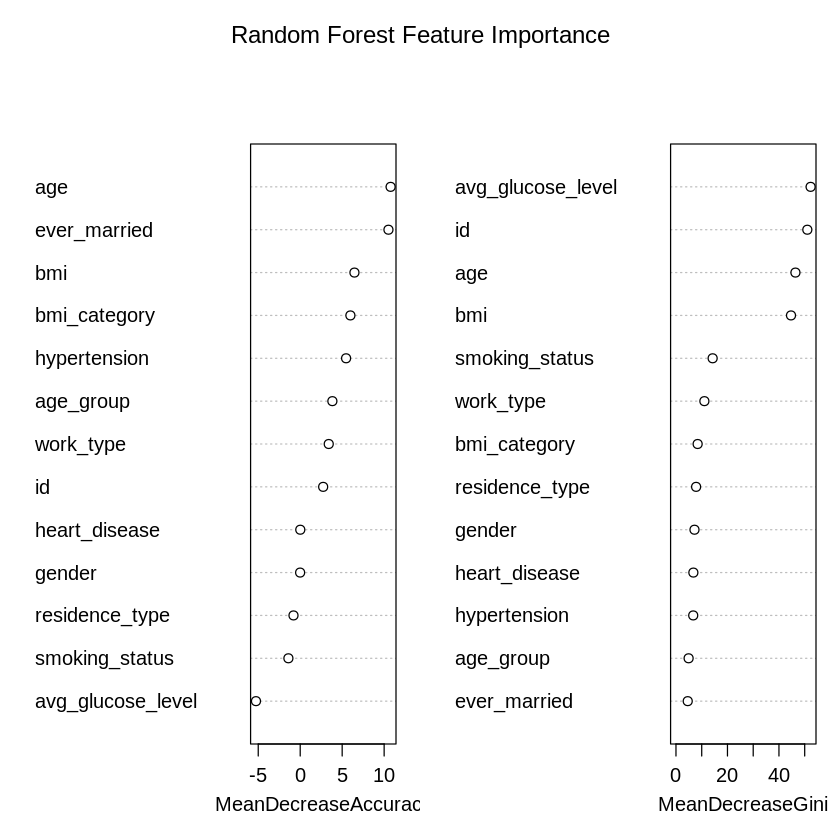

In [ ]:
# Plot feature importance
varImpPlot(rf_model, main = "Random Forest Feature Importance")


In [ ]:
# Create comparison table
comparison <- data.frame(
  Model = c("Logistic Regression", "Random Forest"),
  AUC = c(
    auc(log_roc),
    auc(rf_roc)
  )
)

print(comparison)


                Model       AUC
1 Logistic Regression 0.8619396
2       Random Forest 0.8419619


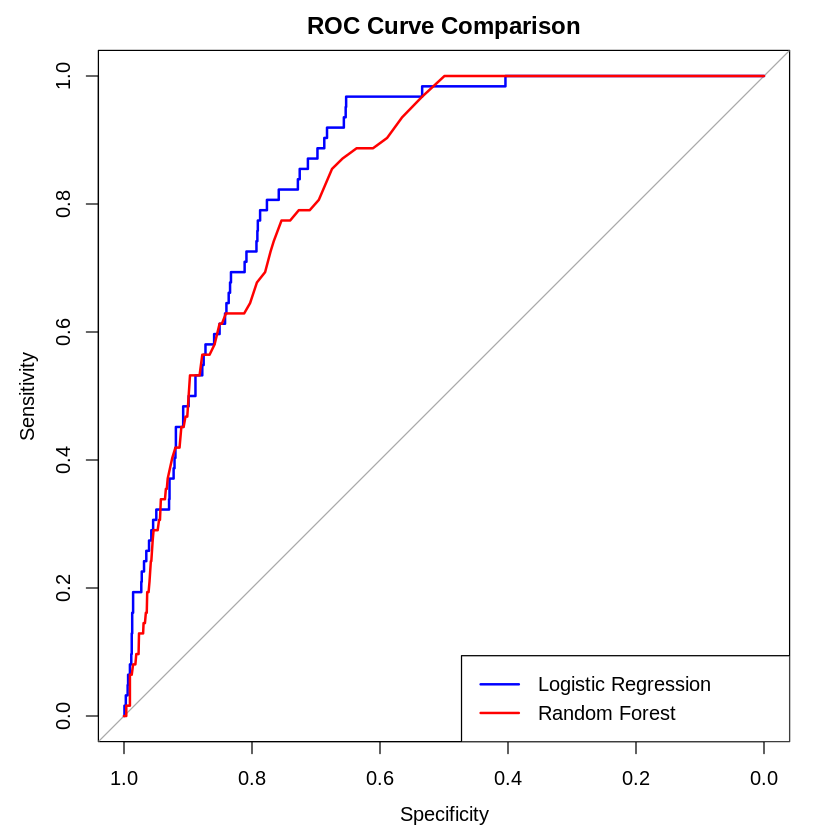

In [ ]:
plot(log_roc, col = "blue", lwd = 2, main = "ROC Curve Comparison")
plot(rf_roc, col = "red", lwd = 2, add = TRUE)

legend(
  "bottomright",
  legend = c("Logistic Regression", "Random Forest"),
  col = c("blue", "red"),
  lwd = 2
)


In [ ]:
# Check class distribution
table(train_data$stroke)

# Proportion
prop.table(table(train_data$stroke))



   0    1 
3281  147 


         0          1 
0.95711785 0.04288215 

In [ ]:
smote_recipe <- recipe(stroke ~ ., data = train_data) %>%
  step_mutate(stroke = factor(stroke)) %>%     # Target must be factor
  step_dummy(all_nominal_predictors()) %>%     # Convert factors → numeric
  step_normalize(all_numeric_predictors()) %>% # Scale features
  step_smote(stroke)                            # Apply SMOTE


In [ ]:
# Prep recipe using training data
smote_prep <- prep(smote_recipe)

# Apply transformations
train_smote <- bake(smote_prep, new_data = NULL)
test_smote  <- bake(smote_prep, new_data = test_data)


In [ ]:
log_smote_model <- glm(
  stroke ~ .,
  data = train_smote,
  family = binomial
)


In [ ]:
# Predict probabilities
log_smote_probs <- predict(
  log_smote_model,
  newdata = test_smote,
  type = "response"
)

# Convert to class labels
log_smote_pred <- ifelse(log_smote_probs > 0.5, 1, 0)
log_smote_pred <- factor(log_smote_pred, levels = c(0, 1))

# Confusion matrix
confusionMatrix(log_smote_pred, test_smote$stroke)


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1047   12
         1  359   50
                                          
               Accuracy : 0.7473          
                 95% CI : (0.7242, 0.7693)
    No Information Rate : 0.9578          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.15            
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7447          
            Specificity : 0.8065          
         Pos Pred Value : 0.9887          
         Neg Pred Value : 0.1222          
             Prevalence : 0.9578          
         Detection Rate : 0.7132          
   Detection Prevalence : 0.7214          
      Balanced Accuracy : 0.7756          
                                          
       'Positive' Class : 0               
                        

In [ ]:
set.seed(123)

rf_smote_model <- randomForest(
  stroke ~ .,
  data = train_smote,
  ntree = 300,
  importance = TRUE
)


In [ ]:
rf_smote_pred <- predict(rf_smote_model, test_smote)

confusionMatrix(rf_smote_pred, test_smote$stroke)


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1351   54
         1   55    8
                                          
               Accuracy : 0.9257          
                 95% CI : (0.9111, 0.9386)
    No Information Rate : 0.9578          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0892          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9609          
            Specificity : 0.1290          
         Pos Pred Value : 0.9616          
         Neg Pred Value : 0.1270          
             Prevalence : 0.9578          
         Detection Rate : 0.9203          
   Detection Prevalence : 0.9571          
      Balanced Accuracy : 0.5450          
                                          
       'Positive' Class : 0               
                        

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
id,5.452239,52.433946,50.351942,1.645053e+02
age,18.428592,48.158707,50.999642,6.740034e+02
hypertension,13.634095,24.958740,24.540916,7.961323e+01
heart_disease,1.147547,22.724757,22.329146,4.364527e+01
avg_glucose_level,1.017336,48.904205,47.381464,2.208168e+02
bmi,9.261778,54.008434,50.752379,2.174623e+02
gender_Male,10.519952,37.774346,32.406001,1.082827e+02
gender_Other,0.000000,0.000000,0.000000,5.750431e-07
ever_married_Yes,11.730375,29.243424,25.169447,1.691351e+02
work_type_Govt_job,7.906003,27.499263,28.618443,4.015753e+01


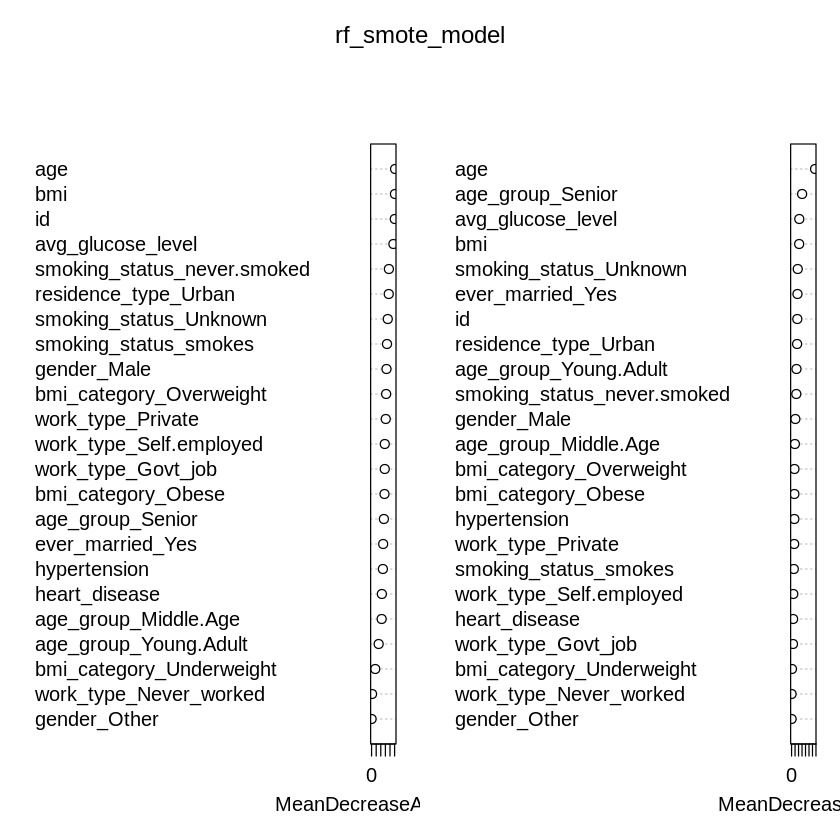

In [ ]:
importance(rf_smote_model)
varImpPlot(rf_smote_model)


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



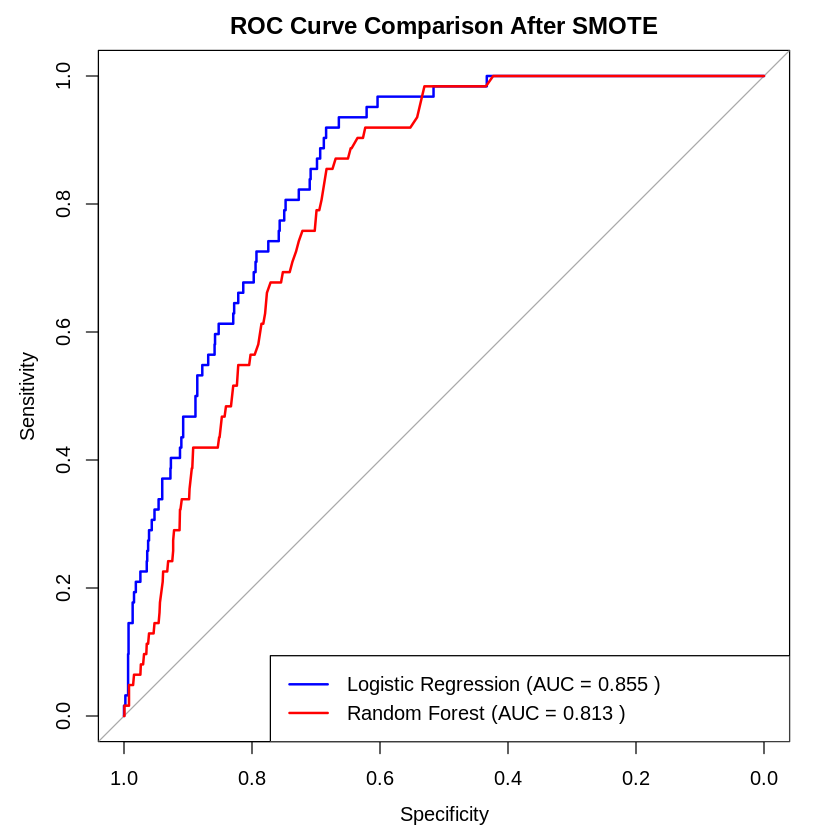

In [ ]:
# Logistic Regression ROC
roc_log_smote <- roc(
  test_smote$stroke,
  log_smote_probs
)

# Random Forest ROC
rf_smote_probs <- predict(
  rf_smote_model,
  test_smote,
  type = "prob"
)[, 2]

roc_rf_smote <- roc(
  test_smote$stroke,
  rf_smote_probs
)

# Plot ROC curves
plot(
  roc_log_smote,
  col = "blue",
  lwd = 2,
  main = "ROC Curve Comparison After SMOTE"
)

lines(
  roc_rf_smote,
  col = "red",
  lwd = 2
)

legend(
  "bottomright",
  legend = c(
    paste("Logistic Regression (AUC =", round(auc(roc_log_smote), 3), ")"),
    paste("Random Forest (AUC =", round(auc(roc_rf_smote), 3), ")")
  ),
  col = c("blue", "red"),
  lwd = 2
)


In [ ]:
# Dashboard Creation

In [ ]:
library(tidyverse)
library(cowplot)    # For arranging plots
library(pROC)



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




In [ ]:
install.packages("cowplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
stroke_data$stroke <- factor(stroke_data$stroke, levels=c(0,1), labels=c("No Stroke","Stroke"))

In [ ]:
# -----------------------------
# Overview Plots
# -----------------------------

In [ ]:
# a. Stroke prevalence (pie)
p1 <- stroke_data %>%
  count(stroke) %>%
  ggplot(aes(x="", y=n, fill=stroke)) +
  geom_col(width=1) +
  coord_polar("y") +
  labs(title="Stroke Prevalence in Population", fill="Stroke Status") +
  theme_void() +
  theme(plot.title = element_text(hjust=0.5, face="bold"))



In [ ]:
# b. Stroke by age group
p2 <- stroke_data %>%
  count(age_group, stroke) %>%
  ggplot(aes(age_group, n, fill=stroke)) +
  geom_col(position="dodge") +
  labs(title="Stroke Cases by Age Group", x="Age Group", y="Count", fill="Stroke Status") +
  theme_minimal() +
  theme(plot.title = element_text(hjust=0.5, face="bold"))


In [ ]:
# -----------------------------
# Risk Factor Plots
# -----------------------------

In [ ]:
# a. Glucose
p3 <- ggplot(stroke_data, aes(x=stroke, y=avg_glucose_level, fill=stroke)) +
  geom_boxplot() +
  labs(title="Average Glucose Level by Stroke Status", x="Stroke", y="Avg Glucose (mg/dL)") +
  theme_minimal() +
  theme(plot.title = element_text(hjust=0.5, face="bold"))


In [ ]:
# b. BMI
p4 <- stroke_data %>%
  count(bmi_category, stroke) %>%
  ggplot(aes(bmi_category, n, fill=stroke)) +
  geom_col(position="dodge") +
  labs(title="BMI Category vs Stroke", x="BMI Category", y="Count", fill="Stroke Status") +
  theme_minimal() +
  theme(plot.title = element_text(hjust=0.5, face="bold"))

In [ ]:
# c. Hypertension (if exists)
if("hypertension" %in% colnames(stroke_data)){
  p5 <- stroke_data %>%
    count(hypertension, stroke) %>%
    ggplot(aes(factor(hypertension), n, fill=stroke)) +
    geom_col(position="dodge") +
    labs(title="Hypertension vs Stroke", x="Hypertension (0=No,1=Yes)", y="Count", fill="Stroke Status") +
    theme_minimal() +
    theme(plot.title = element_text(hjust=0.5, face="bold"))
} else { p5 <- NULL }

In [ ]:
# d. Heart disease (if exists)
if("heart_disease" %in% colnames(stroke_data)){
  p6 <- stroke_data %>%
    count(heart_disease, stroke) %>%
    ggplot(aes(factor(heart_disease), n, fill=stroke)) +
    geom_col(position="dodge") +
    labs(title="Heart Disease vs Stroke", x="Heart Disease (0=No,1=Yes)", y="Count", fill="Stroke Status") +
    theme_minimal() +
    theme(plot.title = element_text(hjust=0.5, face="bold"))
} else { p6 <- NULL }

In [ ]:
# -----------------------------
# Model ROC Plot Function
# -----------------------------

In [ ]:
library(ggplot2)

log_df <- data.frame(
  fpr = 1 - log_roc$specificities,
  tpr = log_roc$sensitivities,
  model = "Logistic Regression"
)

rf_df <- data.frame(
  fpr = 1 - rf_roc$specificities,
  tpr = rf_roc$sensitivities,
  model = "Random Forest"
)

roc_gg <- ggplot(
  rbind(log_df, rf_df),
  aes(x = fpr, y = tpr, color = model)
) +
  geom_line(linewidth = 1.2)+
  geom_abline(linetype = "dashed", color = "grey50") +
  labs(
    x = "False Positive Rate",
    y = "True Positive Rate",
    color = "Model"
  ) +
  theme_minimal() +
  theme(
    legend.position = "bottom"
  )


In [ ]:
# -----------------------------
# Arrange All Plots
# -----------------------------

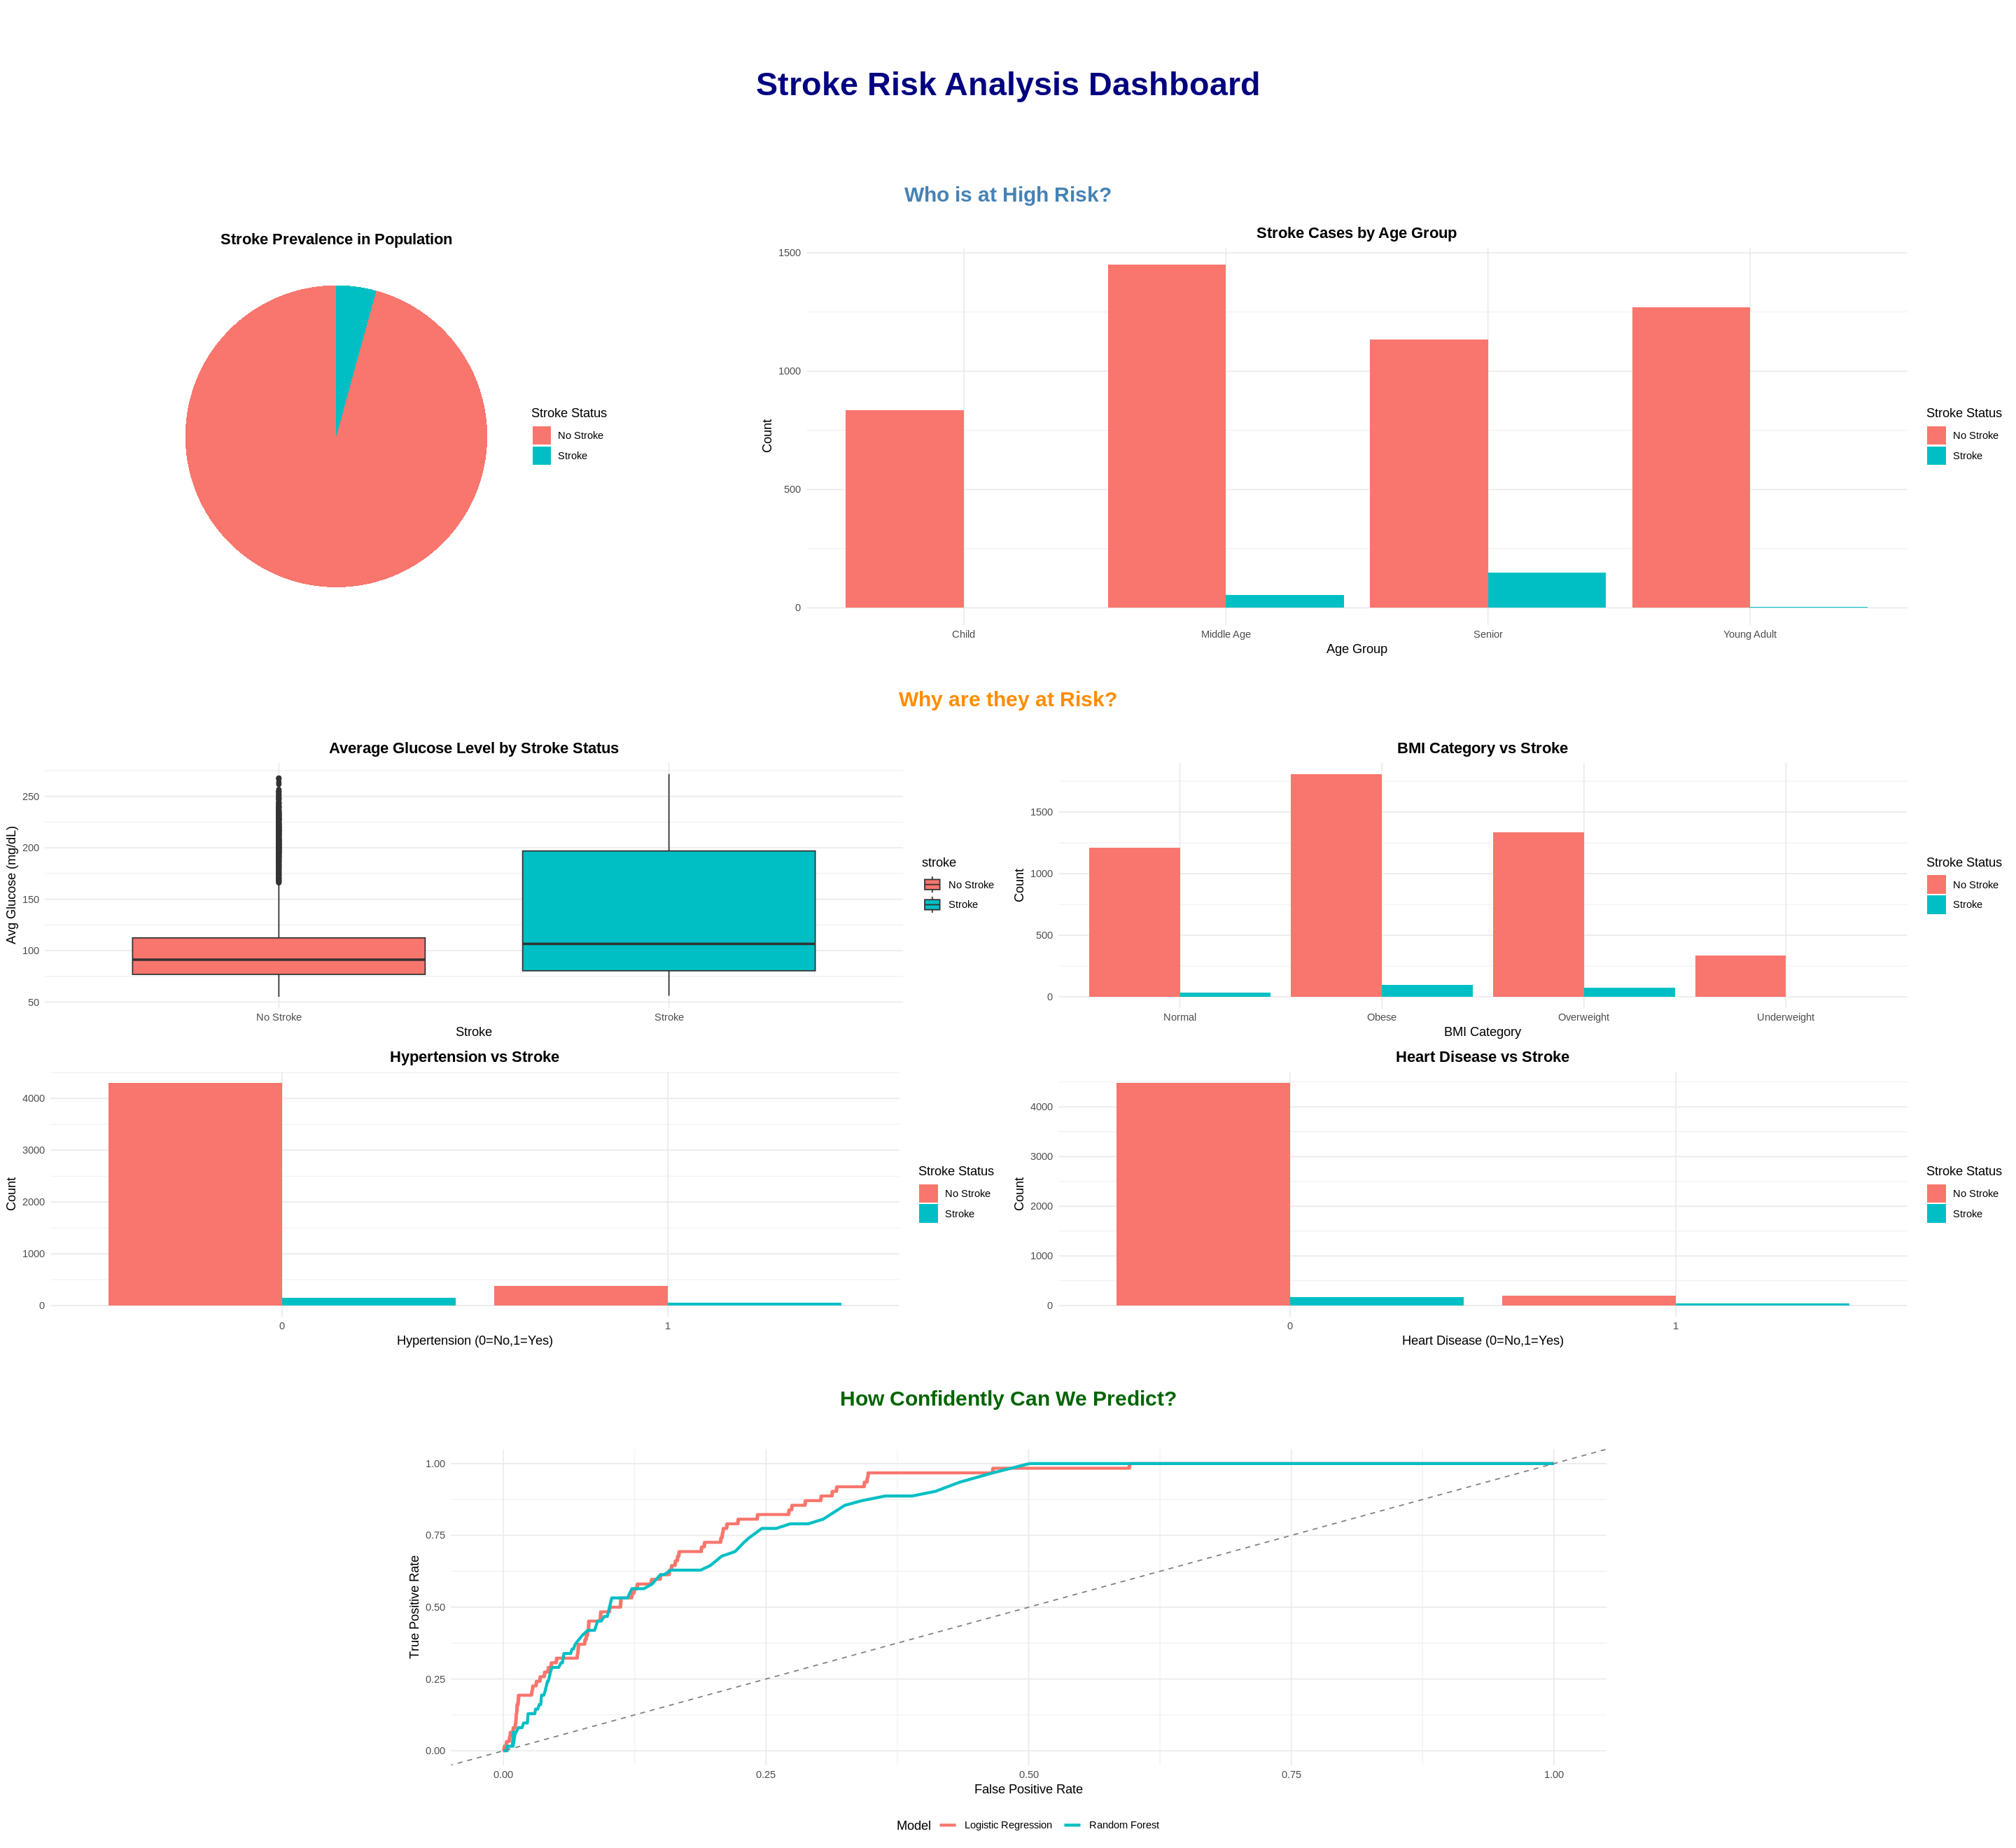

In [ ]:
library(cowplot)

# -----------------------------
# Wider canvas (white background)
# -----------------------------
options(repr.plot.width = 24, repr.plot.height = 22)

# -----------------------------
# Who is at High Risk?
# -----------------------------
who_title <- ggdraw() +
  draw_label(
    "Who is at High Risk?",
    fontface = "bold",
    size = 18,
    color = "steelblue",
    hjust = 0.5
  )

top_row <- plot_grid(
  p1, p2,
  ncol = 2,
  rel_widths = c(1.2, 2),
  align = "h"
)

who_section <- plot_grid(
  who_title,
  top_row,
  ncol = 1,
  rel_heights = c(0.12, 1)
)

# -----------------------------
# Why are they at Risk?
# -----------------------------
why_title <- ggdraw() +
  draw_label(
    "Why are they at Risk?",
    fontface = "bold",
    size = 18,
    color = "darkorange",
    hjust = 0.5
  )

risk_plots <- list(p3, p4, p5, p6)
risk_plots <- risk_plots[!sapply(risk_plots, is.null)]

middle_row <- plot_grid(
  plotlist = risk_plots,
  ncol = 2,
  align = "h"
)

why_section <- plot_grid(
  why_title,
  middle_row,
  ncol = 1,
  rel_heights = c(0.12, 1)
)

# -----------------------------
# How Confidently Can We Predict?
# -----------------------------
confidence_title <- ggdraw() +
  draw_label(
    "How Confidently Can We Predict?",
    fontface = "bold",
    size = 18,
    color = "darkgreen",
    hjust = 0.5
  )

roc_section <- plot_grid(
  confidence_title,
  plot_grid(
    NULL,
    roc_gg,
    NULL,
    ncol = 3,
    rel_widths = c(0.2, 0.6, 0.2)   # center + narrow ROC
  ),
  ncol = 1,
  rel_heights = c(0.18, 0.82)      # give ROC more height
)



# -----------------------------
# 4️⃣ Combine ALL sections
# -----------------------------
main_dashboard <- plot_grid(
  who_section,
  why_section,
  roc_section,
  ncol = 1,
  rel_heights = c(1, 1.4, 1)
)

# -----------------------------
# 5️⃣ Main Dashboard Title
# -----------------------------
dashboard_title <- ggdraw() +
  draw_label(
    "Stroke Risk Analysis Dashboard",
    fontface = "bold",
    size = 28,
    color = "navy",
    hjust = 0.5
  )

final_dashboard <- plot_grid(
  dashboard_title,
  main_dashboard,
  ncol = 1,
  rel_heights = c(0.1, 1)
)

# -----------------------------
# Display ONCE
# -----------------------------
print(final_dashboard)


In [ ]:
# -----------------------------
# Export to wide PNG (white background)
# -----------------------------
ggsave(
  filename = "stroke_dashboard_full.png",
  plot = final_dashboard,
  width = 20,    # wide canvas
  height = 12,   # adjust height as needed
  dpi = 300,
  bg = "white"   # ensures white background
)